## Accelerated EDA (Exploratory Data Analysis)

One of the critical steps in using data for building machine learning models is to do Exploratory Data Analysis (EDA). This step reveals various stats like mean, median, count, extreme values,  common values, distribution, correlation, etc. about the data. 

We have data_analysis module which has functions like stats(), profile_data(), univariate(), bivariate(), multivariate(), skewness and kurtosis. These methods are wrappers of the standard library method with some tweaks.


## Dataset Information

This notebook shows usage example of each of these methods with dataset, taken from the public domain (UCI repository) and contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

There are total 25 features in the dataset and some of them are listed below :-

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)


### Import necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from data_analysis import profile_data, univariate, bivariate, multivariate, stats, skewness,find_kurtosis, correlations

### Load dataset

In [2]:
data = pd.read_csv('UCI_Credit_Card.csv')

### Analyse dataset

In [3]:
data.head(7)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24.0,2,2.0,-1.0,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,1,26.0,-1,2.0,0.0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34.0,0,0.0,0.0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,1,1,37.0,0,0.0,0.0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,NaN,-1,NaN,-1.0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37.0,0,0.0,0.0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29.0,0,0.0,NaN,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0


In [4]:
data.rename(columns={"default.payment.next.month": "Default"}, inplace=True)
data.drop('ID', axis = 1, inplace =True)

### Statistics

For analysing any dataset, its very important to see the quick statistics of the data like mean/median/mode and other similar attributes.
Data_analysis library's stats() does this work. This method takes the dataset as input and returns the descriptive statistics of each feature. It includes the number of observations, mean, standard deviation of the observations, minimum and maximum values along with the percentile (25,50 and 75) values. 

For example - Stats of this use case can be seen by passing the entire dataset to stats() method.

In [11]:
stats(data)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
count,30000.000000,30000.000000,30000.000000,30000.000000,29998.000000,30000.000000,29998.000000,29999.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167477.656000,1.603733,1.853067,1.551833,35.484266,-0.016700,-0.133742,-0.166206,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129710.016716,0.489129,0.790336,0.521973,9.216939,1.123802,1.197215,1.196887,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Data Profiling

Understanding the data is very important before proceeding to any further analysis. Data_analysis library's profile_data() method gives information about the dataset - overview, feature importance, the variable types, distribution of the variables, their statistics, the correlation plots and a sample of the dataset. This method is very helpful in getting a basic understanding of how the data is distributed. 

For example - in this use case, we can pass data and the target variable name ('Default) and it will profile the data and show the report to us.

In [12]:
profile_data(data,'Default')

Number of columns,25
Number of observations,29996
Total Missing (%),0.0%
Total size in memory,5.7 MiB
Average record size in memory,200.0 B
Numeric,18
Categorical,0
Boolean,2
Date,0
Text (Unique),0
Rejected,5


### Univariate Analysis

Univariate analysis is the simplest form of data analysis where the data being analyzed contains only one variable at a time. Since it's a single variable analysis, it doesn’t deal with relationship with other variables.The main purpose of univariate analysis is to describe the data and find patterns that exist within it.

For example, in this use case i.e. "UCI Credit Card" dataset, variables like AGE, LIMIT_BAL, etc. can be analysed by importing univariate function from data_analysis library which plots a univariate distribution of observations consisting histogram(graphical display of data using bars of different heights) with a line on it.

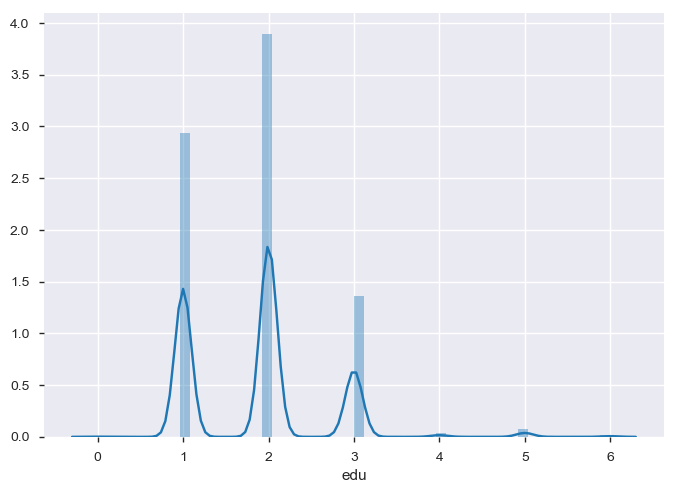

In [13]:
univariate(data['EDUCATION'],norm_hist=True, axlabel='edu')

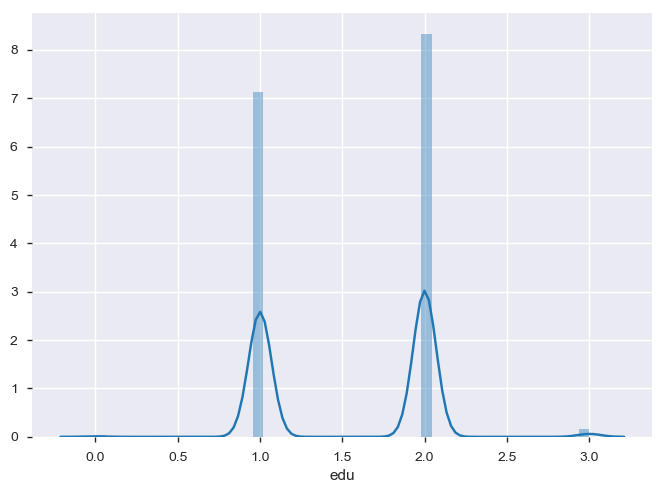

In [14]:
univariate(data['MARRIAGE'],norm_hist=True, axlabel='edu')

### Bivariate Analysis

Bivariate analysis is used to find out if there is any relationship between two different variables and are plotted on X and Y axes. Plots for bivariate analysis can include boxplot, jointplot, pairplot, countplot, scatterplot, lineplot, etc.

All of these plots are available in data_analysis library's bivariate() function.This function can take arguements like "type" of plot which we want to see & x, y for the purpose of determining the empirical relationship between them.

For example, here we can see the relationship among variables like AGE and EDUCATION using jointplot & can see the count of different ages in AGE variable using countplot.

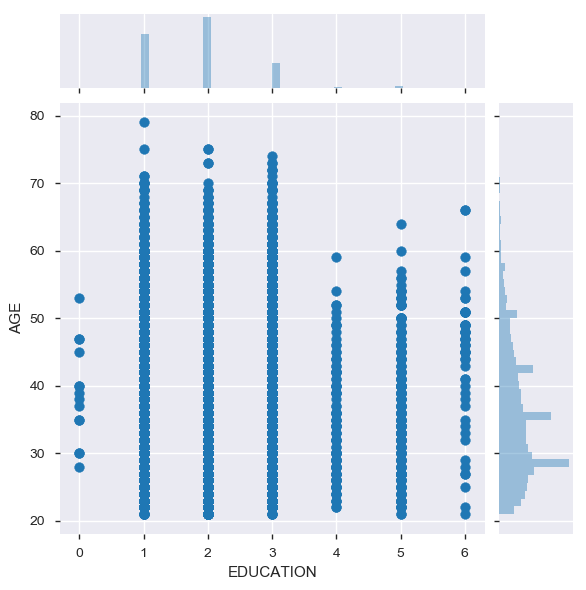

In [15]:
bivariate(type='joint',x=data['EDUCATION'],y=data['AGE'])

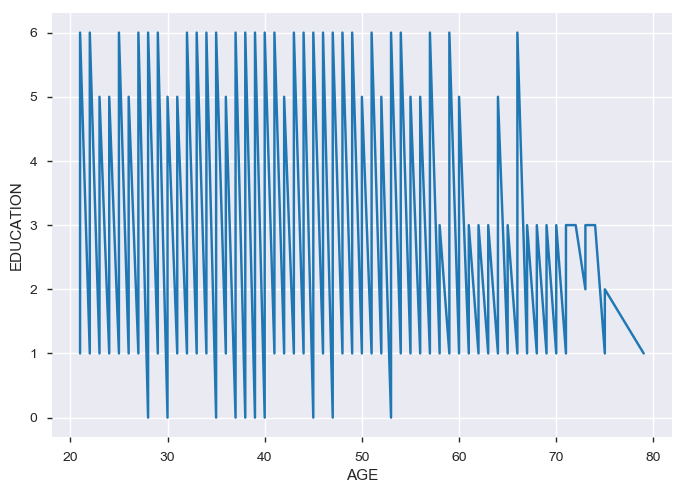

In [17]:
bivariate(type='line',x='AGE',y='EDUCATION',data=data)

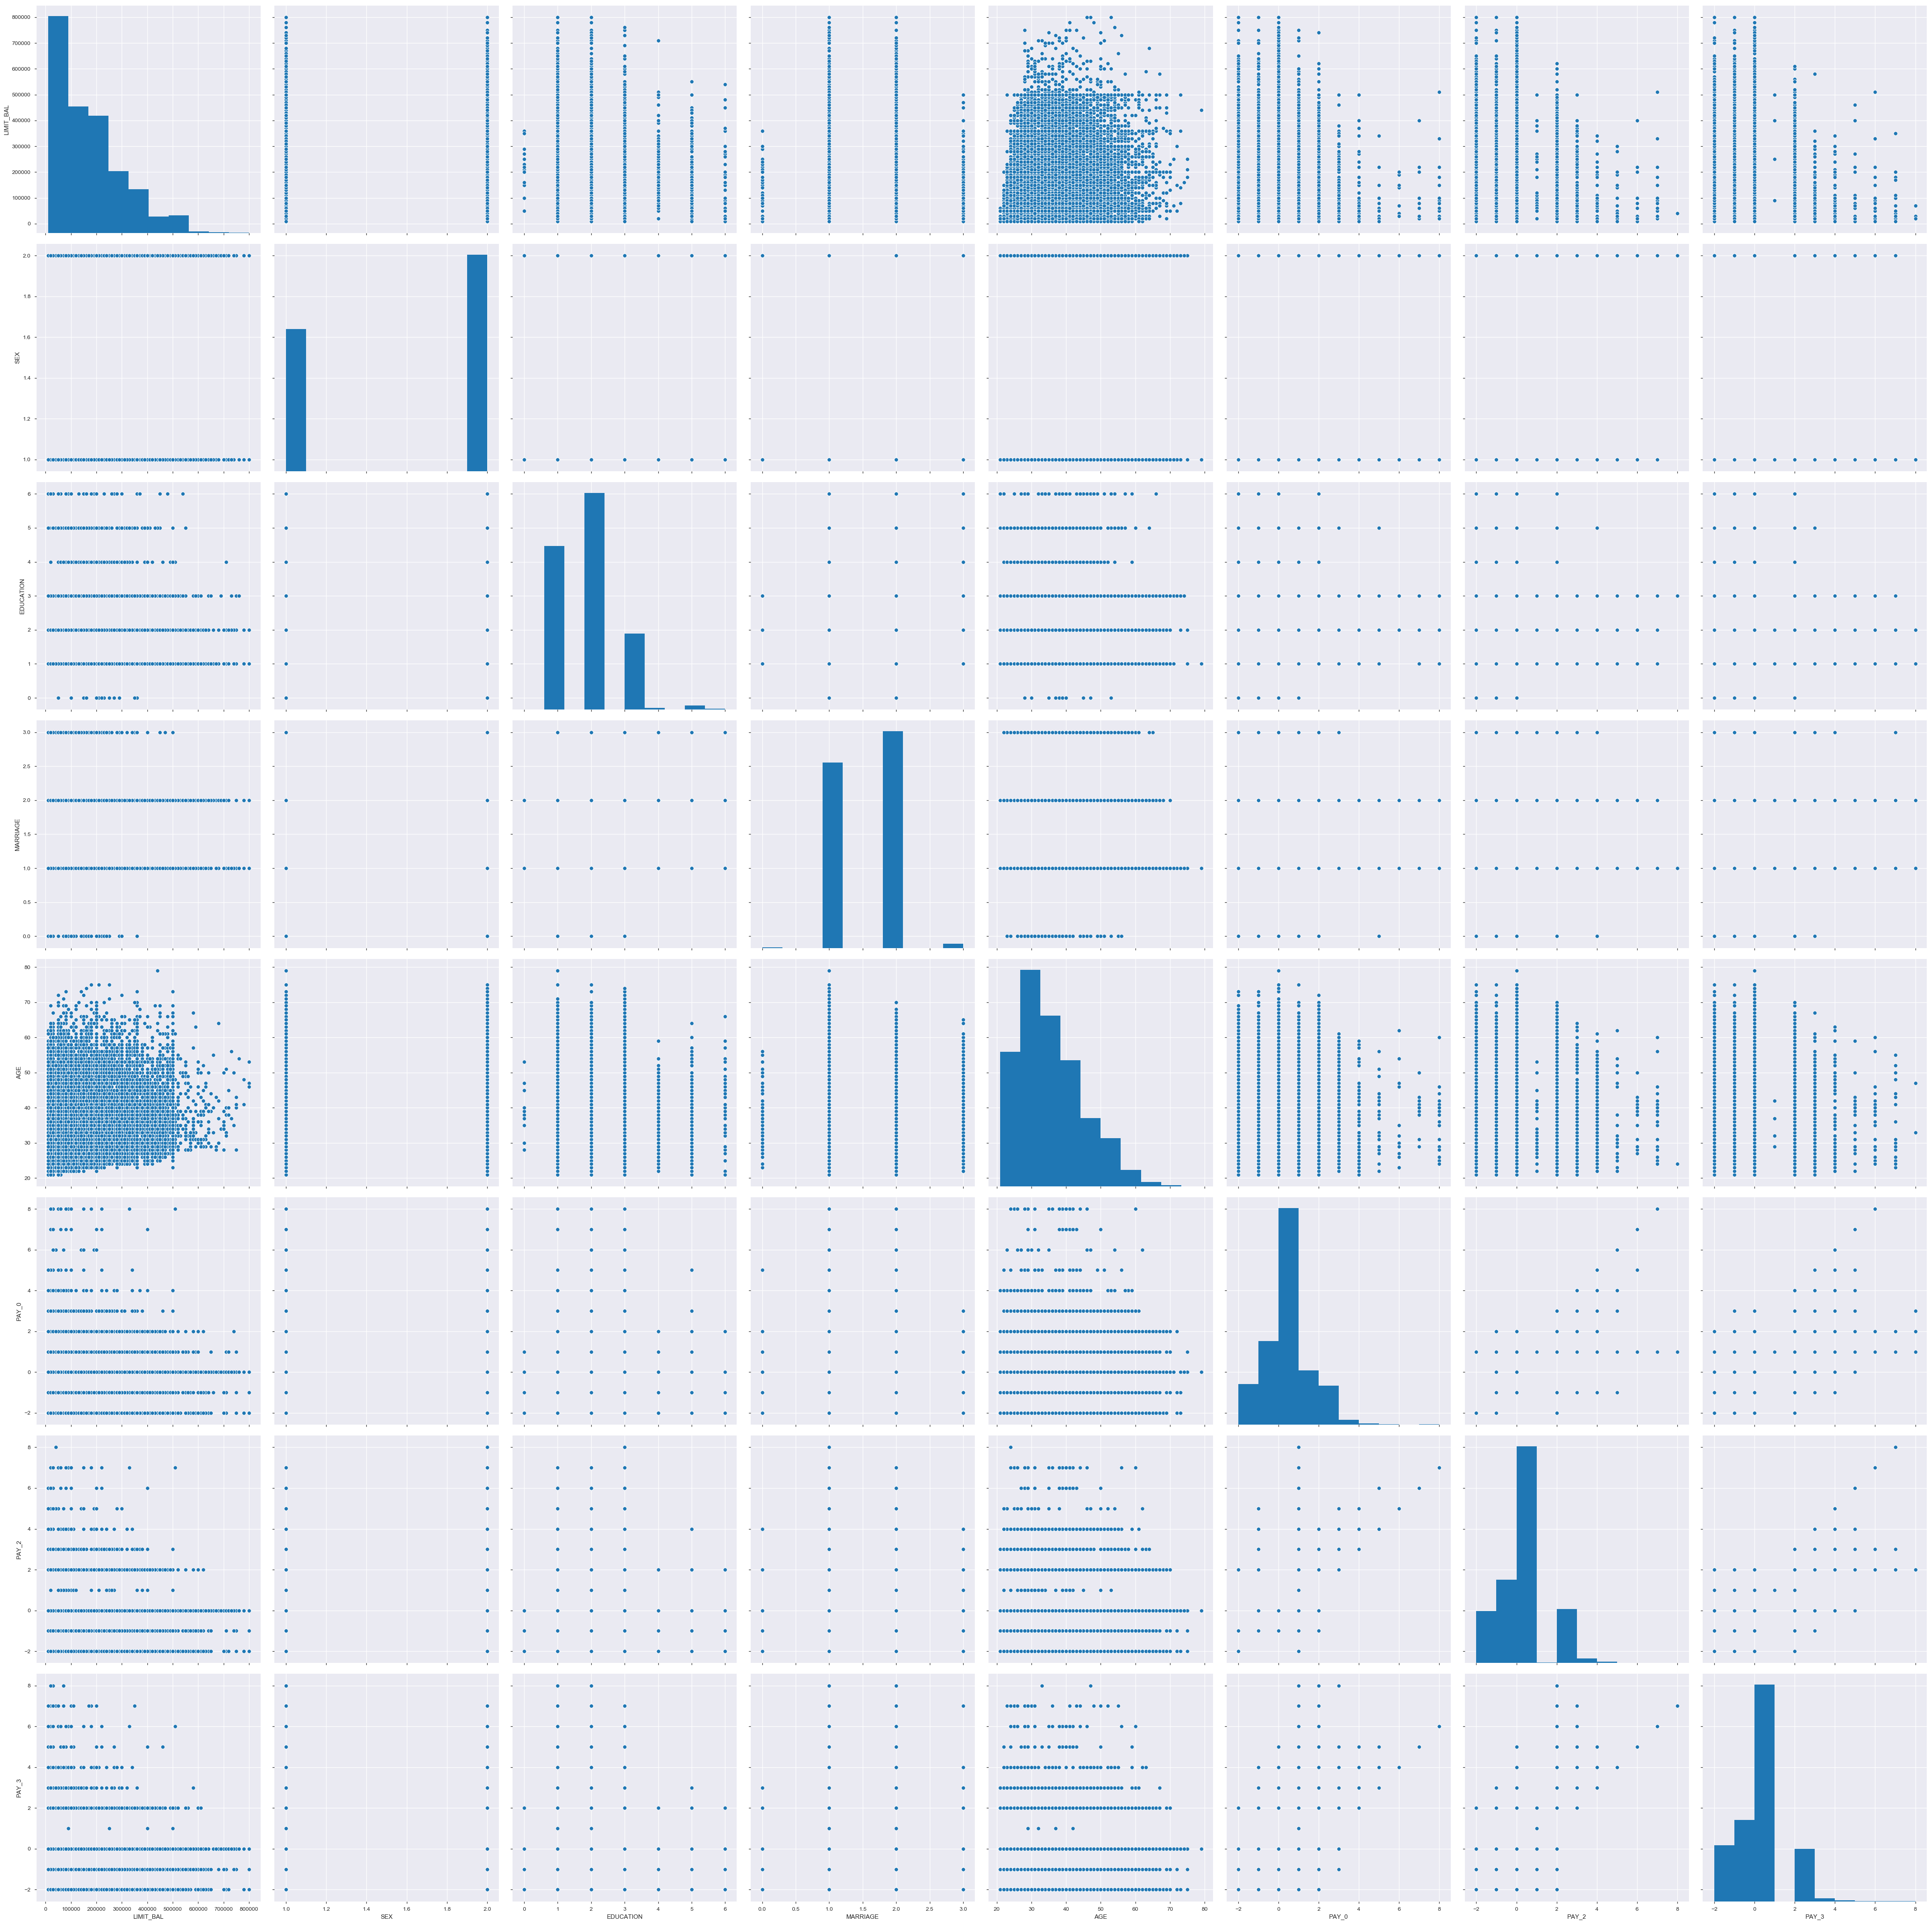

In [18]:
bivariate(type='pair',data=data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3']])

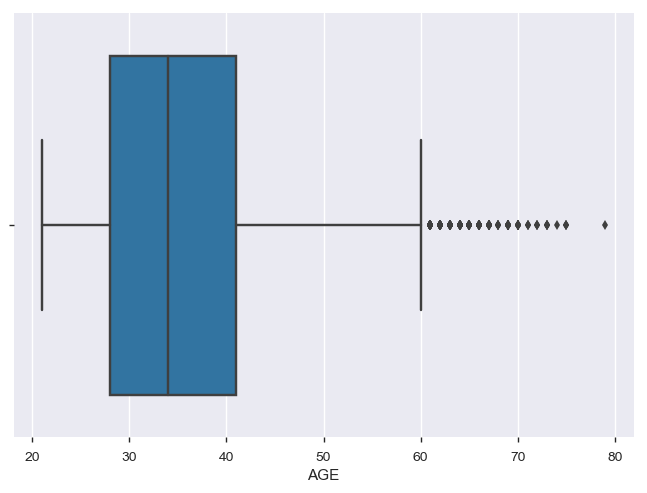

In [20]:
bivariate(type='box',x='AGE', data=data)

### Skewness & Kurtosis

Skewness and Kurtosis help in telling the distribution of a particular column as how the values are distributed.

In [7]:
sk = skewness('LIMIT_BAL',data)
sk

The LIMIT_BAL feature is positively skewed.
A positively skewed distribution has a long right tail.


0.9888668289690513

In [6]:
find_kurtosis('LIMIT_BAL',data)

The LIMIT_BAL feature distribution pattern is Leptokurtic.
Leptokurtic distributions are more peaked than a normal distribution with longer tails.


0.5027752351509491

### Correlations

Before making any machine learning model, we should check how the variables are correlated with each other. If the 2 independent variables are highly correlated with each other, then one of those variable should be removed as it will unnecessary noise to the model. 

Correlations also help in knowing which independent variables impact the target variable which in turn help in selecting the important variables. Data_analysis module provide the correlations() method for this purpose. 

For example, in the below chart we can see that PAY_0 to PAY_6 are more correlated with each other and same with BILL_AMT1 to BILL_AMT6.

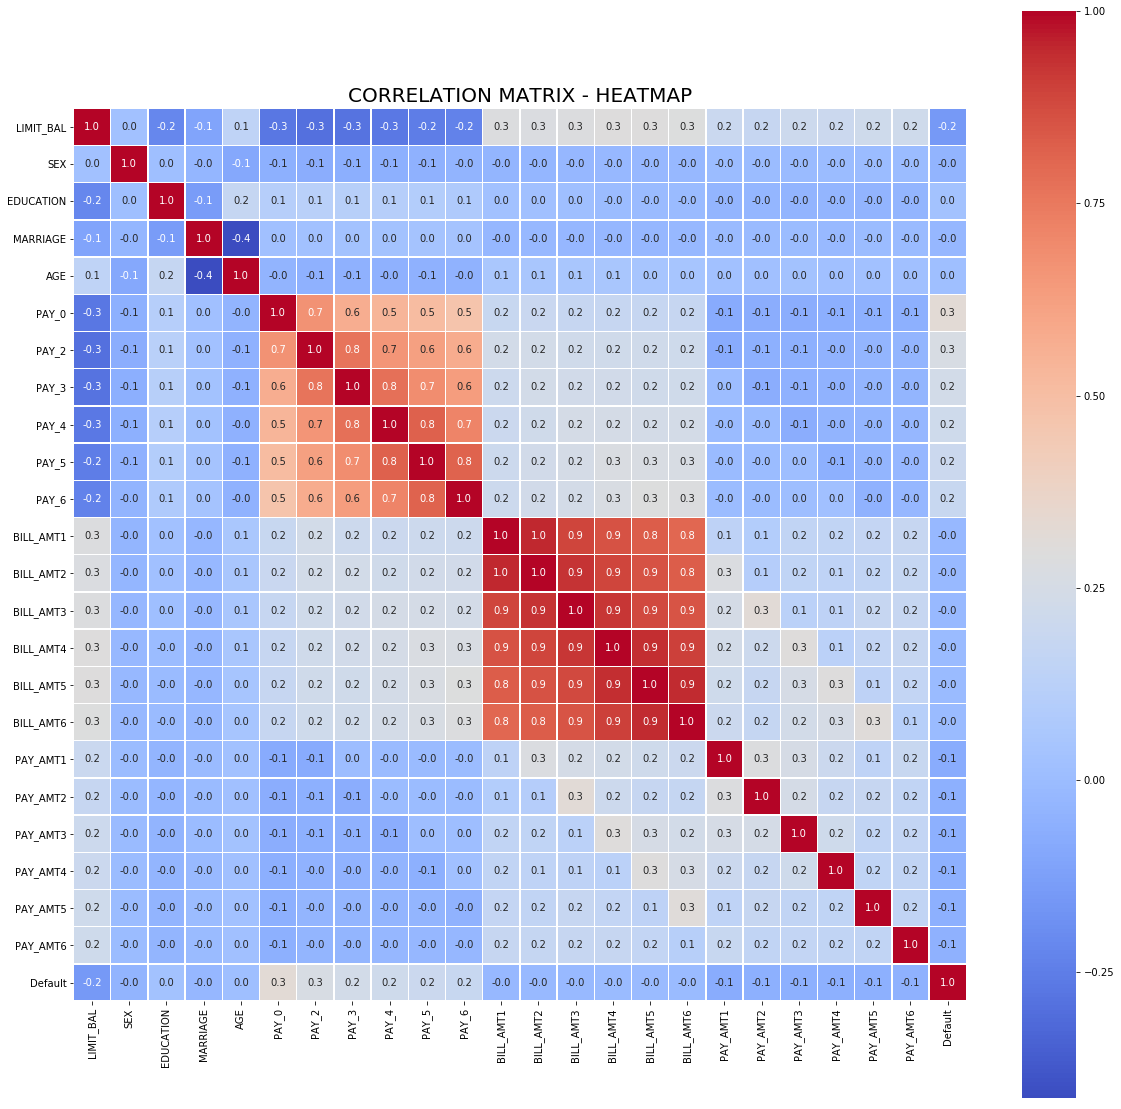

In [5]:
corr_mat = correlations(data)

In [6]:
corr_mat

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
LIMIT_BAL,1.000000,0.024721,-0.219125,-0.108092,0.144744,-0.271294,-0.296491,-0.286256,-0.267503,-0.249496,...,0.293395,0.294898,0.289677,0.195153,0.178360,0.207627,0.203153,0.217113,0.219529,-0.153537
SEX,0.024721,1.000000,0.014164,-0.031440,-0.090839,-0.057643,-0.070750,-0.066092,-0.060173,-0.055064,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219125,0.014164,1.000000,-0.143388,0.175165,0.105364,0.121563,0.113952,0.108779,0.097502,...,-0.000421,-0.007539,-0.009068,-0.037441,-0.030021,-0.039923,-0.038198,-0.040338,-0.037180,0.028051
MARRIAGE,-0.108092,-0.031440,-0.143388,1.000000,-0.414137,0.019973,0.024111,0.032675,0.033109,0.035614,...,-0.023304,-0.025355,-0.021169,-0.005957,-0.008079,-0.003526,-0.012644,-0.001185,-0.006629,-0.024459
AGE,0.144744,-0.090839,0.175165,-0.414137,1.000000,-0.039337,-0.050158,-0.052961,-0.049706,-0.053816,...,0.051418,0.049396,0.047669,0.026113,0.021675,0.029220,0.021299,0.022892,0.019506,0.013963
PAY_0,-0.271294,-0.057643,0.105364,0.019973,-0.039337,1.000000,0.672183,0.574245,0.538841,0.509426,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296491,-0.070750,0.121563,0.024111,-0.050158,0.672183,1.000000,0.766557,0.662078,0.622792,...,0.222226,0.221338,0.219393,-0.080709,-0.059003,-0.055910,-0.046866,-0.037097,-0.036505,0.263545
PAY_3,-0.286256,-0.066092,0.113952,0.032675,-0.052961,0.574245,0.766557,1.000000,0.777359,0.686774,...,0.227395,0.225311,0.222491,0.001281,-0.066803,-0.053322,-0.046072,-0.035866,-0.035863,0.235256
PAY_4,-0.267503,-0.060173,0.108779,0.033109,-0.049706,0.538841,0.662078,0.777359,1.000000,0.819835,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249496,-0.055064,0.097502,0.035614,-0.053816,0.509426,0.622792,0.686774,0.819835,1.000000,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149
